# Logistic Regression using Scikit-Learn

## Logistic Regression

In [1]:
%matplotlib inline
# To get nice quality plots
%config InlineBackend.figure_format = 'svg'

import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt

### Read Data

In [2]:
data = pd.read_csv('data/ex2data1.txt', names = ["Exam 1", "Exam 2", "Admitted"])
X = np.c_[data["Exam 1"], data["Exam 2"]]
y = np.c_[data["Admitted"]]
(m, n) = X.shape

data.head()

,Exam 1,Exam 2,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


### Plot Data

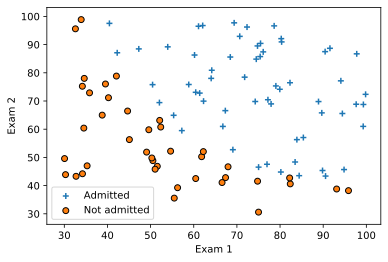

In [3]:
plt.scatter(X[y.flatten() == 1, 0], X[y.flatten() == 1, 1], marker='+', label = 'Admitted')
plt.scatter(X[y.flatten() == 0, 0], X[y.flatten() == 0, 1], marker='o',  edgecolors='k', label = "Not admitted")
plt.ylabel('Exam 2')
plt.xlabel('Exam 1')
plt.legend()
plt.show()

### Model

In [4]:
# Train a logistic model
from sklearn.linear_model import LogisticRegression

# We indicate solver explicitly, otherwise there will be a future-warning, C = np.inf means no regularization
logistic_model = LogisticRegression(solver='lbfgs', C=np.inf)

# fit expects y to be a 1d array and not a column vector, we use ravel() (works for more data types then flatten())
logistic_model.fit(X, y.ravel())

# Best parameters found
print(logistic_model.intercept_, logistic_model.coef_)

[-25.16138567] [[0.20623222 0.20147191]]


### Results

In [5]:
# Compute cost function value
from sklearn.metrics import mean_squared_error

log_reg_pred = logistic_model.predict(X)

log_reg_mse = mean_squared_error(y, log_reg_pred)
log_reg_rmse = np.sqrt(log_reg_mse)

print(log_reg_rmse)

0.33166247903553997


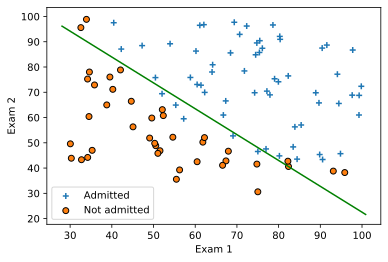

In [6]:
# Plot decision boundary
# Get two endpoints of the line
plot_x = [np.min(X[:,0]-2), np.max(X[:,1]+2)]

# Extract optimal theta from the trained model
theta_opt = [logistic_model.intercept_[0], logistic_model.coef_[0][0], logistic_model.coef_[0][1]]
# Calculate Line
plot_y = -1/theta_opt[2]*(theta_opt[0] + np.dot(theta_opt[1], plot_x))

plt.scatter(X[y.flatten() == 1, 0], X[y.flatten() == 1, 1], marker='+', label = 'Admitted')
plt.scatter(X[y.flatten() == 0, 0], X[y.flatten() == 0, 1], marker='o',  edgecolors='k', label = "Not admitted")
plt.plot(plot_x, plot_y, c='g')
plt.ylabel('Exam 2')
plt.xlabel('Exam 1')
plt.legend()
plt.show()

In [7]:
# There is a 77.6% chance that a student with test-scores 45 and 85 will be admitted:
p = logistic_model.predict_proba(np.array([45, 85]).reshape(1, -1))
p

array([[0.22370987, 0.77629013]])

In [8]:
# Calculate percentage of correctly classified samples:
model_score = logistic_model.score(X, y)
print(model_score)

0.89


## Regularized Logistic Regression

### Read Data

In [9]:
data2 = pd.read_csv('data/ex2data2.txt', names = ["Microchip Test 1", "Microchip Test 2", "Accepted"])
X2 = np.c_[data2["Microchip Test 1"], data2["Microchip Test 2"]]
y2 = np.c_[data2["Accepted"]]
(m2, n2) = X2.shape
data2.head()

,Microchip Test 1,Microchip Test 2,Accepted
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


### Plot Data

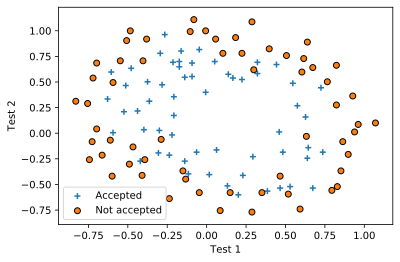

In [10]:
plt.scatter(X2[y2.ravel() == 1, 0], X2[y2.ravel() == 1, 1], marker='+', label = 'Accepted')
plt.scatter(X2[y2.ravel() == 0, 0], X2[y2.ravel() == 0, 1], marker='o',  edgecolors='k', label = "Not accepted")
plt.ylabel('Test 2')
plt.xlabel('Test 1')
plt.legend()
plt.show()

### Model

In [11]:
# Construct polynomial features up to and including degree 6
from sklearn.preprocessing import PolynomialFeatures

# Polynomial features should not include the bias term! This will be added automatically by the logistic model
degree = 6
poly = PolynomialFeatures(degree, include_bias=False)
X2_poly = poly.fit_transform(X2)

In [12]:
# We indicate solver explicitly, otherwise there will be a future-warning, C = 1 is equivalent to lambda = 1 (C = 1/lambda)
logistic_model2 = LogisticRegression(solver='lbfgs', C=1)

# fit expects y to be a 1d array and not a column vector, we use ravel() (works for more data types then flatten())
logistic_model2.fit(X2_poly, y2.ravel())

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### Results

In [13]:
# Print the optimal parameters
print(logistic_model2.intercept_, logistic_model2.coef_)

[1.27271075] [[ 0.62536719  1.18095854 -2.01961804 -0.91752388 -1.43170395  0.12391867
  -0.36536954 -0.35715555 -0.17501434 -1.45827831 -0.05112356 -0.61575808
  -0.27472128 -1.19276292 -0.24241519 -0.20587922 -0.0448395  -0.27780311
  -0.29535733 -0.45625452 -1.04347339  0.02770608 -0.29252353  0.01550105
  -0.32746466 -0.1439423  -0.92460358]]


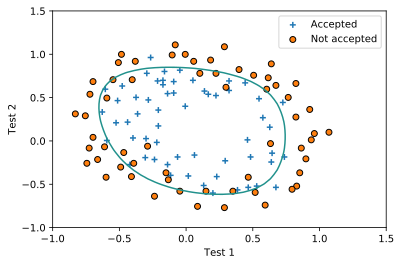

In [14]:
# Plotting the decision boundary
theta_opt2 = np.concatenate((logistic_model2.intercept_, logistic_model2.coef_[0]))[:, np.newaxis]

def mapFeaturesForPlotting(X1, X2, degree):
    out = np.ones(1)
    for i in range(1, degree+1):
        for j in range(i+1):
            out = np.hstack((out, X1 ** (i-j) * X2 ** j))
    return out

def plotDecisionBoundary(theta, degree):
    u = np.linspace(-1, 1.5, 50)
    v = np.linspace(-1, 1.5, 50)
    z = np.zeros((len(u), len(v)))
    
    for i in range(len(u)):
        for j in range(len(v)):
            z[i,j] = mapFeaturesForPlotting(u[i], v[j], degree) @ theta
    # We have to transpose z        
    z = z.T
    plt.contour(u, v, z, 0)
    
plt.scatter(X2[y2.flatten() == 1, 0], X2[y2.flatten() == 1, 1], marker='+', label = 'Accepted')
plt.scatter(X2[y2.flatten() == 0, 0], X2[y2.flatten() == 0, 1], marker='o',  edgecolors='k', label = "Not accepted")
plotDecisionBoundary(theta_opt2, degree)
plt.ylabel('Test 2')
plt.xlabel('Test 1')
plt.legend()
plt.show()